<h1><center>Laboratorio 10: Interpretabilidad 🤖</center></h1>

<center><strong>MDS7202: Laboratorio de Programación Científica para Ciencia de Datos</strong></center>

### Cuerpo Docente:

- Profesor: Ignacio Meza, Gabriel Iturra
- Auxiliar: Sebastián Tinoco
- Ayudante: Arturo Lazcano, Angelo Muñoz

### Equipo: SUPER IMPORTANTE - notebooks sin nombre no serán revisados

- Nombre de alumno 1:Álvaro Gallardo Alvarado
- Nombre de alumno 2:Maximiliano Westerhout Aliste


### **Link de repositorio de GitHub:** `https://github.com/alvarogallardo/Lab-10-Progra-cientifica.git`

### Indice

1. [Temas a tratar](#Temas-a-tratar:)
3. [Descripcción del laboratorio](#Descripción-del-laboratorio.)
4. [Desarrollo](#Desarrollo)

## Temas a tratar

- Clasificación usando `XGBoost`.
- Métodos Agnósticos Globales de Interpretabilidad (`Partial Dependence Plot`, `Permutation Feature Importance`)
- Métodos Agnósticos Locales de Interpretabilidad (`Scoped Rules`, `SHAP`)

## Reglas:

- **Grupos de 2 personas**
- Asistencia **obligatoria** a instrucciones del lab (viernes 16.15). Luego, pueden quedarse trabajando en las salas o irse.
- **No se revisarán entregas de personas ausentes**.
- Cualquier duda fuera del horario de clases al foro. Mensajes al equipo docente serán respondidos por este medio.
- Prohibidas las copias.
- Pueden usar cualquer matrial del curso que estimen conveniente.

### Objetivos principales del laboratorio

- Generar un pipeline de clasificación con `XGBoost`.
- Implementar modelos de interpretabilidad para explicar el funcionamiento del modelo de clasificación.

El laboratorio deberá ser desarrollado sin el uso indiscriminado de iteradores nativos de python (aka "for", "while"). La idea es que aprendan a exprimir al máximo las funciones optimizadas que nos entrega `pandas`, las cuales vale mencionar, son bastante más eficientes que los iteradores nativos sobre DataFrames.

# 1. Problemas Clínicos del Dr. Simi

<p align="center">
  <img src="https://gantz.cl/wp-content/uploads/2020/01/79024136_2718114448239059_7240913062570491904_o.jpg" width="350">
</p>

El reconocido **Dr. Simi**, famoso vendedor de medicamentos en latinoamerica, debido a la creciente prevalencia de enfermedades crónicas, como la diabetes, decidió abrir una clínica especializada en el tratamiento de esta enfermedad en nuestro país.

La clínica del Doctor Simi se convirtió en un lugar donde los pacientes con diabetes podrían recibir atención médica integral. El personal médico estaba compuesto por especialistas en endocrinología, nutrición y enfermería, todos capacitados en el manejo de la diabetes.

Sin embargo él se ha dado cuenta que los tiempos han cambiado y gracias a las tecnologías es posible generar mejores predicciones en la diabetes conociendo el historial médico de las personas. Por esto, el doctor se ha colocado una meta de incluir modelos de machine learning dentro de sus clínicas, para ello le ha solicitado crear un modelo capaz de predecir/clasificar diabetes pero le rogó que el desarrollo del modelo tuviera un especial enfoque en la interpretabilidad de lo que hace su modelo.

Para que usted pueda entrenar el modelo, Dr. Simi le ha entregado un dataset de todos los clientes que fueron detectados con diabetes a lo largo de la historia de la clinica. Con ello, adjunta el historial médico de las personas en forma de datos tabulares para que usted pueda realizar fácilmente la clasificación.


In [ ]:
import numpy as np
import pandas as pd

df = pd.read_csv('diabetes_data.csv')
df.head(4)

,Age,Sex,HighChol,CholCheck,BMI,Smoker,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,GenHlth,MentHlth,PhysHlth,DiffWalk,Stroke,HighBP,Diabetes
0,4.0,1.0,0.0,1.0,26.0,0.0,0.0,1.0,0.0,1.0,0.0,3.0,5.0,30.0,0.0,0.0,1.0,0.0
1,12.0,1.0,1.0,1.0,26.0,1.0,0.0,0.0,1.0,0.0,0.0,3.0,0.0,0.0,0.0,1.0,1.0,0.0
2,13.0,1.0,0.0,1.0,26.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,10.0,0.0,0.0,0.0,0.0
3,11.0,1.0,1.0,1.0,28.0,1.0,0.0,1.0,1.0,1.0,0.0,3.0,0.0,3.0,0.0,0.0,1.0,0.0


## 2. Clasificación de pacientes con diabetes (0.5 puntos)

<p align="center">
  <img src="https://media.tenor.com/QH--g3ZaSbsAAAAC/dr-simi-abrazo.gif" width="400">
</p>

En primer lugar, el reconocido doctor le pide entrenar un modelo de `XGBoost` utilizando como target la columna `Diabetes` del dataset `diabetes_data.csv`. Para el entrenamiento tome en cuenta **todos** los pasos necesarios para entrenar un modelo de aprendizaje supervisado vistos hasta la fecha (use `Pipeline`, `ColumnTransformer`, etc.), comente sus decisiones y los resultados obtenidos con el modelo. ¿Es acaso un buen predictor de diabetes?, ¿Qué buscan explicar las métricas utilizadas?, ¿las métricas utilizadas para medir la predictibilidad le permiten asegurar que su modelo haga una buena elección de las features?.

In [ ]:
df.isna().sum()

Age                     0
Sex                     0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Stroke                  0
HighBP                  0
Diabetes                0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70692 entries, 0 to 70691
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Age                   70692 non-null  float64
 1   Sex                   70692 non-null  float64
 2   HighChol              70692 non-null  float64
 3   CholCheck             70692 non-null  float64
 4   BMI                   70692 non-null  float64
 5   Smoker                70692 non-null  float64
 6   HeartDiseaseorAttack  70692 non-null  float64
 7   PhysActivity          70692 non-null  float64
 8   Fruits                70692 non-null  float64
 9   Veggies               70692 non-null  float64
 10  HvyAlcoholConsump     70692 non-null  float64
 11  GenHlth               70692 non-null  float64
 12  MentHlth              70692 non-null  float64
 13  PhysHlth              70692 non-null  float64
 14  DiffWalk              70692 non-null  float64
 15  Stroke             

In [ ]:
df.describe()

,Age,Sex,HighChol,CholCheck,BMI,Smoker,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,GenHlth,MentHlth,PhysHlth,DiffWalk,Stroke,HighBP,Diabetes
count,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000
mean,8.584055,0.456997,0.525703,0.975259,29.856985,0.475273,0.147810,0.703036,0.611795,0.788774,0.042721,2.837082,3.752037,5.810417,0.252730,0.062171,0.563458,0.500000
std,2.852153,0.498151,0.499342,0.155336,7.113954,0.499392,0.354914,0.456924,0.487345,0.408181,0.202228,1.113565,8.155627,10.062261,0.434581,0.241468,0.495960,0.500004
min,1.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7.000000,0.000000,0.000000,1.000000,25.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,9.000000,0.000000,1.000000,1.000000,29.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.500000
75%,11.000000,1.000000,1.000000,1.000000,33.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,4.000000,2.000000,6.000000,1.000000,0.000000,1.000000,1.000000
max,13.000000,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
for colum in df.columns:
  valores =len(df[colum].unique())
  print(colum,valores)

Age 13
Sex 2
HighChol 2
CholCheck 2
BMI 80
Smoker 2
HeartDiseaseorAttack 2
PhysActivity 2
Fruits 2
Veggies 2
HvyAlcoholConsump 2
GenHlth 5
MentHlth 31
PhysHlth 31
DiffWalk 2
Stroke 2
HighBP 2
Diabetes 2


Se tiene que las variables que tienen 2 valores son categoricas

variables con más valores númericas como age y BMI

GenHlth, MentHlth, PhysHlth al tener más valores númericos pero de metricas se considera ordinal


In [ ]:
!pip install xgboost

              precision    recall  f1-score   support

         0.0       0.77      0.71      0.74      7090
         1.0       0.73      0.79      0.76      7049

    accuracy                           0.75     14139
   macro avg       0.75      0.75      0.75     14139
weighted avg       0.75      0.75      0.75     14139

Mean Absolute Error XGBClassifier: 0.2511493033453568


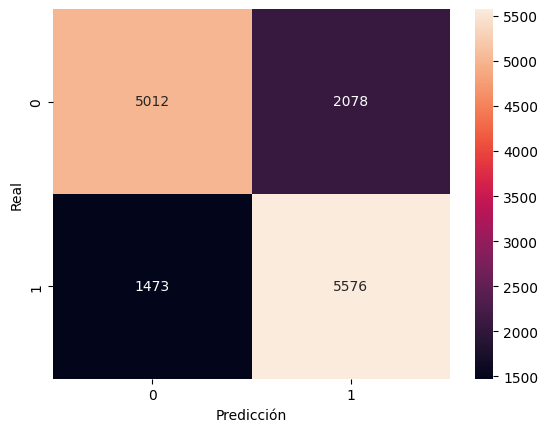

In [ ]:
# Inserte su código aquí
import pandas as pd
import numpy as np
from datetime import datetime
import pickle
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.base import BaseEstimator, TransformerMixin
from  sklearn.model_selection import train_test_split
from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.dummy import DummyRegressor
from xgboost import XGBClassifier
from xgboost import plot_importance
from sklearn.metrics import mean_absolute_error, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Dividimos los datos
X = df.drop('Diabetes', axis=1)  # Características
y = df['Diabetes']  # target

# Dividir los datos en conjuntos de entrenamiento y prueba (80% entrenamiento, 20% prueba)
# Random state 42 = semilla
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

numeric_var = ['Age', 'BMI']
ordinal_var = ['GenHlth', 'MentHlth', 'PhysHlth']
categorical_var = ['Sex', 'HighChol', 'CholCheck', 'Smoker', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump', 'DiffWalk', 'Stroke', 'HighBP']

#Implementacion ColumnTransformer
preprocesamiento = ColumnTransformer(transformers = [
    ('Procesamiento_numericas',StandardScaler(),numeric_var),
    ('Procesamiento_ordinales',OrdinalEncoder(),ordinal_var)],
    remainder="passthrough",verbose_feature_names_out=False)


preprocesamiento.set_output(transform='pandas')

pipeline = Pipeline(steps=[
    ('preprocessor',preprocesamiento),
    ('classifier', XGBClassifier(random_state=42))
])

#Entrenamos el pipeline
pipeline.fit(X_train, y_train)

# Predicciones en el conjunto de prueba
y_pred = pipeline.predict(X_test)

# Evaluar el rendimiento del modelo utilizando classification_report
print(classification_report(y_test, y_pred))

# Evaluar el rendimiento del modelo utilizando mean_absolute_error
mae = mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error XGBClassifier: {mae}')

# Matriz de confusión
confusion_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(confusion_matrix, annot=True, fmt='d')
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.show()

¿Es acaso un buen predictor de diabetes?

En general, el modelo se puede decir que tiene un desempeño aceptable en las metricas que se mencionaran a continuación, respecto a la matriz de confusión se puede observar que existe una alta probabilidad de falla, por lo que es mejorable.

¿Qué buscan explicar las métricas utilizadas?

Las métricas utilizadas buscan explicar el rendimiento de un modelo como predictor de diabetes, estas son precisión (precision), recall, F1-score y la exactitud (accuracy), además del Mean Absolute Error.

*   Precision: Esta representa la proporción de verdaderos positivos(diagnósticos correctos de diabetes) entre el total de positivos predichos por el modelo. En este caso, la precisión es del 77% para la clase 0 'no diabetes' y del 73% para la clase 1 'diabetes'. Esto quiere decir que el 77% de las veces que el modelo predice 'no diabetes', acierta, y el 73% de las veces que predice 'diabetes', acierta.

*   Recall: Esta representa la proporción de verdaderos positivos(diagnósticos correctos de diabetes) entre todos los verdaderos positivos reales. En este caso, el recall es del 71% para la clase 0 'no diabetes' y del 79% para la clase 1 'diabetes'. Esto indica que el modelo identifica al 71% de los casos reales de 'no diabetes' y al 79% de los casos reales de 'diabetes'.

*   F1-score: Esta representa una medida ponderada de precisión y recall. Cuanto más cercano a 1 sea el valor, mejor es la clasificación. En este caso, el F1-score es 0.74 para la clase 0 'no diabetes' y 0.76 para la clase 1 'diabetes'.

*   Accuracy: Esta representa la proporción de predicciones correctas en general. En este caso, el accuracy que tiene el modelo es de 75%, lo que significa que el 75% de todas las predicciones son correctas.

*   El Mean Absolute Error (MAE) es una medida de la diferencia absoluta entre las predicciones del modelo y los valores reales. Un MAE bajo indica que las predicciones del modelo están cerca de los valores reales.

*   La matriz de confusión muestra la distribución del modelo al predecir, indicando si está acertando o fallando en sus predicciones para cada clase. En este caso, se observa que el modelo tiene un número mayor en falsos positivos (2078) que falsos negativos (1473), además se muestra que tiene más aciertos en el diagnostico de diabetes.

¿las métricas utilizadas para medir la predictibilidad le permiten asegurar que su modelo haga una buena elección de las features?

Estas métricas proporcionan una visión completa del rendimiento del modelo en la predicción de diabetes. Si bien las métricas tienen un desempeño aceptable, no garantizan que las características seleccionadas sean las óptimas para la predicción, es decir, se puede buscar optimizar el modelo para mejorar su predicción o ajustar el equilibrio entre la precisión y el recall dependiendo de las necesidades específicas de la aplicación del modelo.

## 3. Importancia de las features con XGBoost (0.5 puntos)

<p align="center">
  <img src="https://media.tenor.com/5JAj5_IiagEAAAAd/dr-simi-dr-simi-dance.gif" width="400">
</p>

Para añadir el toque de interpretabilidad que Dr. Simi le pide, se le pide calcular la **importancia de las features** del modelo entrenado utilizando todos los métodos (*weight*, *cover*, *gain*) que posee xgboost usando `plot_importance`. ¿Los resultados obtenidos con los diferentes métodos son compatibles?, comente sus resultados y a que se debe la igualdad o desigualdad que ve en los resultados. Finalmente, ¿las importancias obtenidas son suficientes para obtener la interpretabilidad de un modelo que utiliza árboles? ¿Qué debilidad presenta este método?

In [ ]:
print(pipeline.named_steps['classifier'])

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)


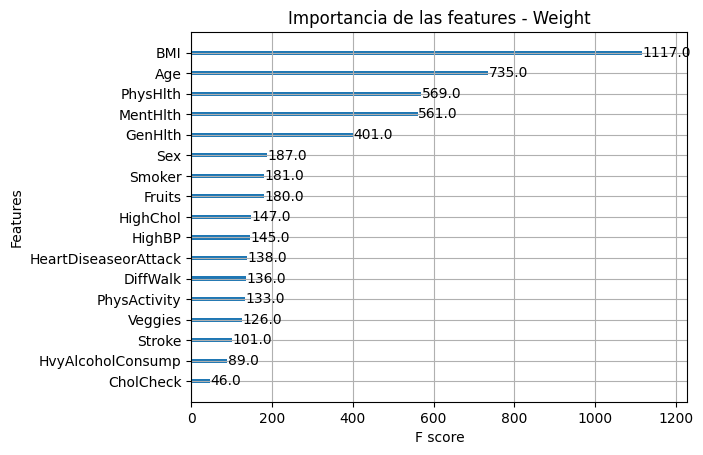

In [ ]:
# Inserte su código aquí
plot_importance(pipeline.named_steps['classifier'], importance_type='weight')
plt.title('Importancia de las features - Weight')
plt.show()

Importancia de las features - Weight

Este método cuenta cuántas veces aparece una característica en los árboles del modelo. Las características más frecuentemente utilizadas tienden a tener un mayor peso, lo que puede indicar su relevancia en la toma de decisiones del modelo. En este caso BMI, Age, PhysHlth y MentHlth tienen los valores más altos, por lo que se consideran como las caracteristicas mas importantes segpun el metodo weight ya que tienen una mayor frecuencia de aparición.

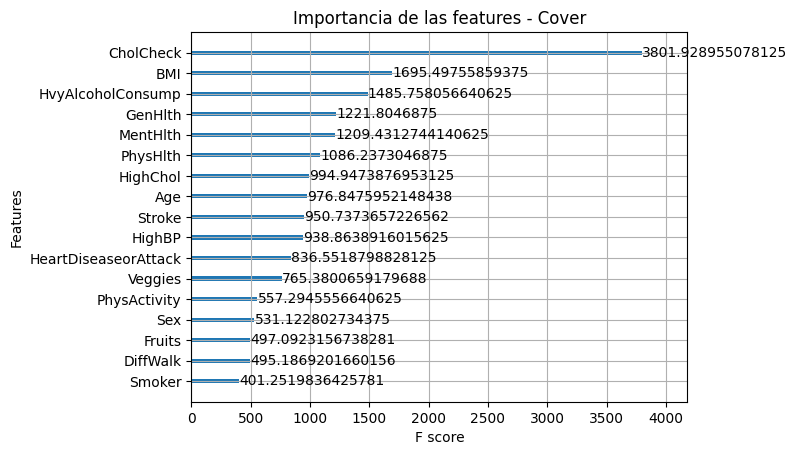

In [ ]:
plot_importance(pipeline.named_steps['classifier'], importance_type='cover')
plt.title('Importancia de las features - Cover')
plt.show()

Cover: Este metodo mide la cantidad de datos que son afectados por la inclusión de una característica en los árboles del modelo. Esta métrica proporciona información sobre cuánto contribuye una característica a reducir la pérdida promedio. En este caso CholCheck es la que tiene un valor más alto, en segundo lugar BMI y tercero HvyAlcoholConsump, dichas caracteristicas son las que más contribuyen a reducir la perdida promedio.

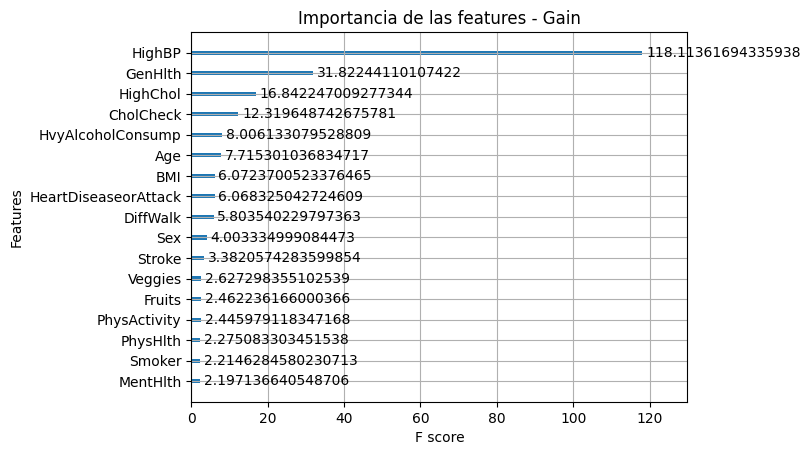

In [ ]:
plot_importance(pipeline.named_steps['classifier'], importance_type='gain')
plt.title('Importancia de las features - Gain')
plt.show()

Gain: Este metodo calcula la importancia de una característica basada en cómo contribuye a mejorar la función de pérdida cuando se utiliza en un árbol. Es decir, mide el aumento promedio de la impureza (como la ganancia de información) causada por una característica cuando se utiliza para dividir los datos. En este caso, HighBP, GenHlth y HighChol tienen los valores más altos, por lo que contribuyen de manera significativa a la reducción de la división en los arboles

 ¿Los resultados obtenidos con los diferentes métodos son compatibles?, comente sus resultados y a que se debe la igualdad o desigualdad que ve en los resultados.¿Las importancias obtenidas son suficientes para obtener la interpretabilidad de un modelo que utiliza árboles? ¿Qué debilidad presenta este método?


Los resultados obtenidos con diferentes métodos para calcular la importancia de las características pueden ser compatibles o no, dependiendo de cómo se mide la importancia en cada método.

En el caso de modelos que utilizan árboles, las importancias calculadas podrían ser consistentes entre sí, aunque se midan de maneras distintas. Sin embargo, las discrepancias podrían surgir debido a las métricas utilizadas por cada método para definir la importancia.


Por ejemplo, Weight se enfoca en cuántas veces se utiliza una característica, Cover se basa en la cantidad de datos que esa característica influye, y Gain considera cómo una característica ayuda a mejorar la eficiencia de las divisiones en los árboles de decisión.

Estas métricas son valiosas al ofrecer visiones distintas de la importancia de las características. Sin embargo, se puede decir que la debilidad que tienen es que no capturan las relaciones complejas o interacciones entre características. Tampoco reflejan cómo el conjunto de características contribuye de manera conjunta a las predicciones del modelo.

Esta limitación puede dificultar la interpretación total del modelo, ya que no se consideran las relaciones o la influencia combinada de las características en las predicciones. Por lo tanto, aunque estas métricas sirven para comprender la importancia relativa de las características, no proporcionan una imagen completa de cómo interactúan las características para influir en las predicciones del modelo.


## 4. Métodos Agnósticos Globales (1.0 puntos)

<p align="center">
  <img src="https://media.tenor.com/JcRHtjVuXN8AAAAC/dr-simi-farmacias-similares.gif" width="400">
</p>

Para mitigar los problemas encontrados en la sección anterior, Dr. Simi le pide implementar un **método de permutación** que le permita observar la importancia de las features. Visualice los resultados de este método en un gráfico. Para que su modelo sea consistente, repita el proceso **30 veces** y verifique la desviación estándar de sus resultados (¿Qué señala está?). Además, responda las siguientes preguntas:


- ¿Cómo mide la importancia de las features su propuesta?
- ¿Qué features tienen un mayor impacto en la salida del modelo?. Comente las 5 primeras, ¿Tienen sentido?
- ¿Cómo cambian sus conclusiones con respecto a las features importances del punto anterior?
- Nombre y explique 3 ventajas y 3 desventajas del método implementado.

[0.02764693 0.00285027 0.01130679 0.00375085 0.03305986 0.00075441
 0.00426008 0.00077563 0.00013674 0.0006554  0.00434496 0.05654101
 0.00163142 0.00072377 0.00369192 0.0015937  0.0157319 ]
[0.0021241  0.00115049 0.00156482 0.00052973 0.00218419 0.00056679
 0.00080717 0.00060332 0.00079242 0.00077325 0.00077103 0.00276211
 0.00109811 0.00139095 0.00100195 0.0006267  0.00143055]


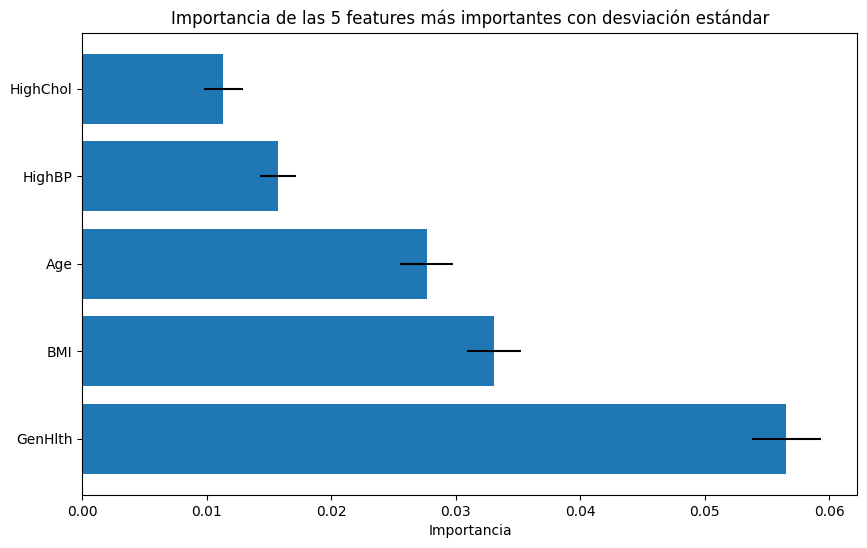

In [ ]:
# Inserte su código aquí
from sklearn.inspection import permutation_importance

# Entrenamos el pipeline
pipeline.fit(X_train, y_train)

# calculamos la importancia de las features con el método de permutación
permutation = permutation_importance(pipeline, X_test, y_test, n_repeats=30, random_state=42)

# promedio y desviación estándar
mean = permutation.importances_mean
std = permutation.importances_std
print(mean)
print(std)

# graficamos la importancia
sorted_idx = np.argsort(mean)[::-1]  # Índices ordenados por importancia
features = X_test.columns[sorted_idx]
plt.figure(figsize=(10, 6))
plt.barh(features[:5], mean[sorted_idx][:5], xerr=std[sorted_idx][:5], align='center')
plt.xlabel('Importancia')
plt.title('Importancia de las 5 features más importantes con desviación estándar')
plt.show()

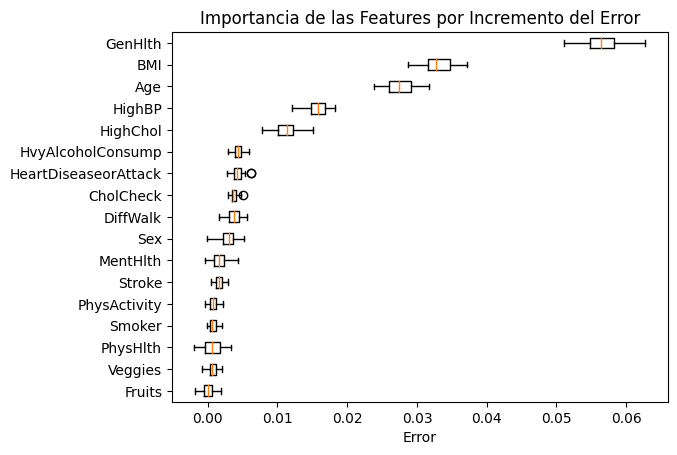

In [ ]:
perm_sorted_idx = permutation.importances_mean.argsort()
plt.boxplot(
    permutation.importances[perm_sorted_idx].T,
    vert=False,
    labels=np.array(X_test.columns.to_list())[perm_sorted_idx],
)
plt.title("Importancia de las Features por Incremento del Error")
plt.xlabel('Error')
plt.show()

- ¿Cómo mide la importancia de las features su propuesta?

La propuesta utilizada corresponde al permutation_importance, este metodo mide la importancia por medio de dos valores de error uno asociado al error del modelo original respecto a la prediccion y otro asociado a la permutacion de caracteristicas tambien respecto a la prediccion. Basicamente, calcula errores asociados a todo el modelo y tambien por cada caracteristica independiente permutando cada caracteristica en el conjunto de datos, de modo que se rompe la asociacion entre caracteristicas y el "y" final, , de este modo al restar ambos valores o dividirlos, se obtiene una nueva metrica asociada a la importancia de la caracteristica. En los graficos, se aprecia el error permutado que corresponde al error asociado a cada caracteristica en donde la Importancia = error_permutado - error_modelo-original, por ello mientras mayor sea dicho error mayor importancia posee la variable.

- ¿Qué features tienen un mayor impacto en la salida del modelo?. Comente las 5 primeras, ¿Tienen sentido?

Las 5 primeras corresponden a : GenHlth, BMI, Age, HighBP y HighChol. Estas variables corresponden a lo siguiente:

1) GenHlth: Esta variable corresponde a "General Health", corresponde a la pregunta que se la hace el paciente referido a "Would you say that in general your health is: rate (1 ~ 5)". Diria que tiene sentido esta variable pero al ser una pregunta subjetiva esta muy ligada al criterio de la persona, de todos modos pareciera ser que las respuestas fueron bastante acertadas dada la relevancia de la variable.

2)BMI: El BMI o Body Mass Index traducido a indice de masa corporal, corresponde al porcentaje de grasa presente en el paciente referido al peso y estatura. Tiene todo el sentido del mundo que esta variable sea importante debido a que por lo general ppersonas que tienen mucha grasa o estan en sobrepeso tienden a tener mas riesgo de padecer diabetes, del mismo modo, que personas con muy bajo peso tambien son propensas, por ello, es de suponer que este indice sea una variable importante al momento de generar el pronostico.

3) Age: La EDAD tambien es un indicativo clasico de diabetes, en donde, dependiendo del tipo de diabetes existen rangos de edad que son muy propensas a tener dichas enfermedades. Por ello, tiene todo el sentido que tambien se considere esta variable.

4)HighBP: La HighBP corresponde a una variable binaria que indica si el paciente se le a dicho anteriormente que tiene la presion arterial alta. La presion sanguinea tambien se relaciona con la diabetes debido a que los pacientes tienden a sufrir problemas al comenzar a presentar sintomas de la enfermada, por ello tambien tiene sentido esta variable.

5)HighChol: Similar a la anterior variable solo que en este caso referido al colesterol, en donde no es tan evidente la relacion pero probablemente tiene un efecto similar a la anterior variable, en donde se suele ligar mucho que pacienets con mala presion arterial generen problemas o tengan mucho colesterol. Por ello nos hace sentido que se relacionen de cierta forma con la diabetes.

En general, la unica variable extraña es la mas importante, en donde un parametro subjetivo toma una importancia muy grande.

- ¿Cómo cambian sus conclusiones con respecto a las features importances del punto anterior?

Cambia bastante, en donde ninguno de los anteriores resultados obtuvo el mismo top de variables, aun asi, se repiten varias en algunos de los graficos. Se destaca que no esta en el top 5 ni CholCheck, ni HvyAlcholConsump las cuales si estuvieron en algunos de los tops de arriba.

- Nombre y explique 3 ventajas y 3 desventajas del método implementado.

Este metodo posee las siguientes ventajas:

- Fácil interpretación: Informacion sencilla de interpretar, calcula errores con metricas conocidas.
- Alta compresión de interpretabilidad global: Manteniene el nombre de las variables, hace comparacion con ellas.
- Comparable con diferentes modelos: Tal como el analisis anterior, basicamente no genera una metrica nueva relacionada al total del conjunto de variables.

Las siguientes desventajas:

- Enlazado al error del modelo: Si el modelo es malo, la importanica genera calculos sin sentido a causa del error_modelo.
- Necesita acceso a la gold label: Utiliza la data de la variable objetivo, lo cual es una desventaja debido a que se requiere la data etiquetada. Basicamente, es una desventaja por que existen otros metodos que no ocupan esa informacion.
- Si las features están correlacionadas puede generar sesgos por entradas poco realistas: Esto se genera por la permutaciones entre caracteristicas y el error calculado por permutacion.

## 5. Métodos Agnósticos Locales (2.0 puntos)

<p align="center">
  <img src="https://i.makeagif.com/media/1-27-2017/fBrzT8.mp4" width="400">
</p>

### 5.1 Calculando Shap Values (0.4 puntos)

Alegre por saber cómo funciona el modelo de predicción a nivel general, Dr. Simi le pide ahora interpretar las predicciones de su modelo a nivel de paciente (es decir, desde un punto de vista **local**). Para esto, el ilustre farmacéutico le pide calcular los *shap values* de su modelo. ¿Qué representa cada número en su resultado? ¿Es posible atribuir un significado a la positividad/negatividad de cada valor?

In [ ]:
!pip install shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 532.9/532.9 kB 8.0 MB/s eta 0:00:00


In [ ]:
import warnings
warnings.filterwarnings("ignore", message=".*The 'nopython' keyword.*")

[21:03:55] WARNING: /workspace/src/c_api/c_api.cc:1240: Saving into deprecated binary model format, please consider using `json` or `ubj`. Model format will default to JSON in XGBoost 2.2 if not specified.


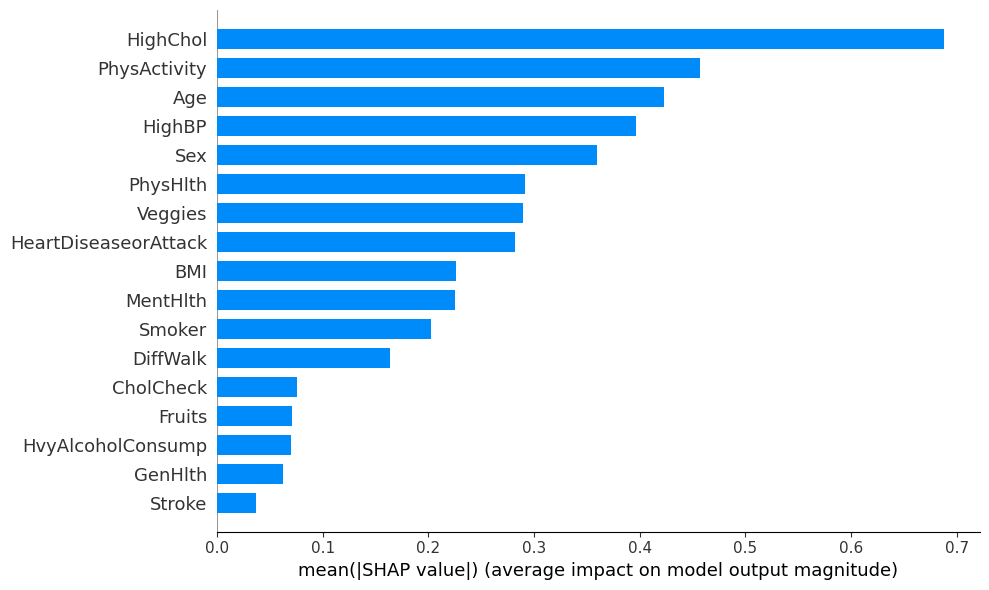

In [ ]:
# Inserte código para calcular shapley values aquí
import shap

#pipeline.fit(X_test, y_test)
# creamos el explainer
explainer = shap.TreeExplainer(pipeline.named_steps['classifier'])

# calculamos los shapley values
shap_values = explainer(X_test)
# Graficamos los shapley values
shap.summary_plot(shap_values, X_test, plot_type='bar', plot_size=(10, 6))
plt.show()

Los valores shap representan la contribución de cada característica a la predicción del modelo para un caso individual en comparación a la predicción promedio del modelo.

Cada shap values indica cómo esa característica afecta en la predicción del modelo para un caso especifico.

La positividad o negatividad de cada valor se interpreta en relación con su efecto en la predicción:

valor positivo: Indica que el valor alto de esa característica contribuye a aumentar la predicción del modelo para ese caso especifico en comparación con la predicción promedio.

Valor negativo: Esto significa que la ausencia o un valor bajo de esa característica contribuye a disminuir la predicción del modelo para ese caso específico en comparación con la predicción promedio.

### 5.2 Aporte local (0.4 puntos)

Usando los *shap values* calculados, grafique el **aporte** de las diferentes variables para las instancias **1**, **9** y **150**, interprete sus resultados y responda:
- ¿Qué variables afectan de manera positiva/negativa a la probabilidad de poseer diabetes?
- ¿Existe algún patrón común entre las instancias analizadas?
- ¿Es posible generalizar estas conclusiones a todo el dataset?

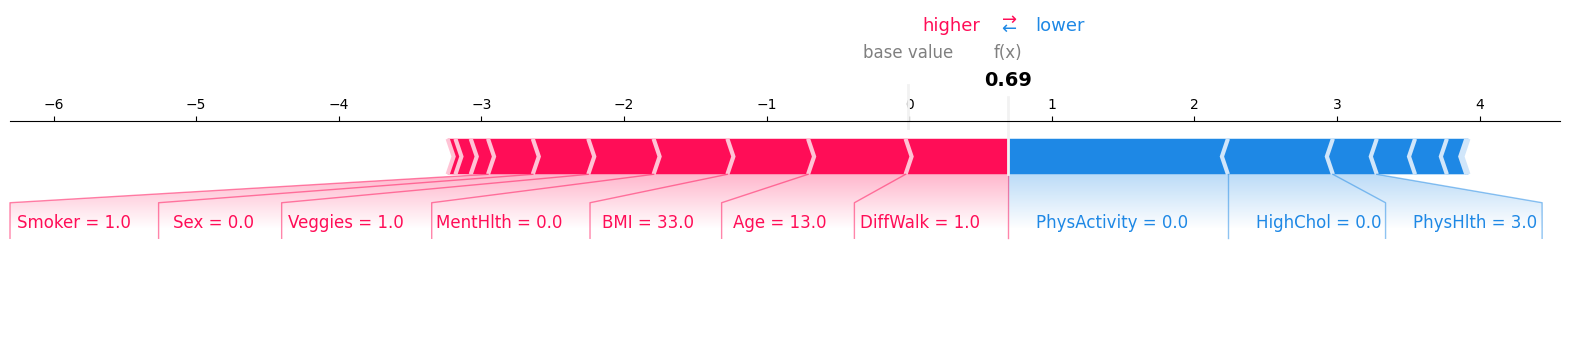

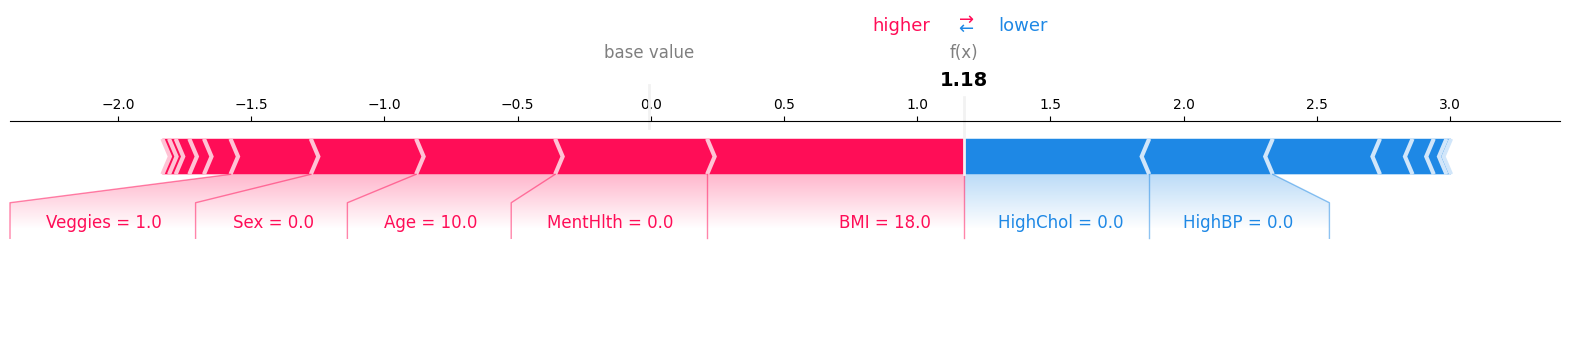

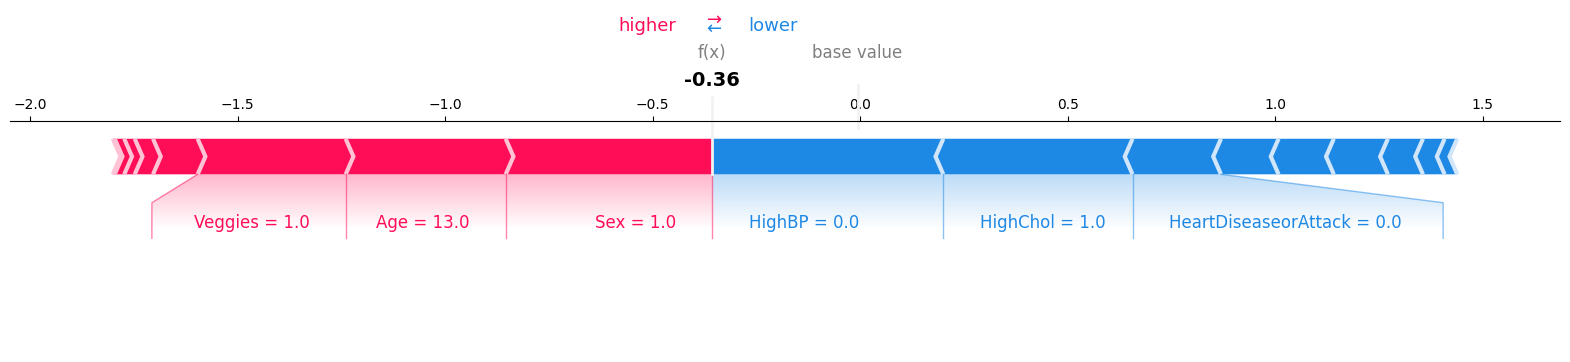

In [ ]:
import shap
from shap import force_plot

shap.initjs()

# Obtener el aporte de las diferentes variables para las instancias 1, 9 y 150
idx = [1, 9, 150]

for instance in idx:
    shap.force_plot(explainer.expected_value,
                shap_values.values[instance,:],
                X_test.iloc[instance,:],
                matplotlib=True )

Los gráficos muestran la influencia de distintas características en predicciones específicas.

Para la diabetes, se tiene que las variables Smoker, Sex, Veggies, MentHith, BMI, Age  y Diffwalk tienen un impacto positivo, mientras que PhyActivity, HighChol y PhyHith lo tienen de manera negativa.

Sin embargo, estas relaciones no se mantienen consistentes en todos los casos ya que va cambiando, ya que en el siguiente caso las variables Veggies, Sex, Age, MentHith, BMI tienen un impacto positivo, mientras que HighChol y HighBP lo tienen de manera negativa.

Por ultimo en el otro caso, Veggies, Age y Sex tienen un impacto positivo, mientras que HighBP, HighChol y HeartDiseaseorAttack lo tienen de manera negativa. Es por eso que se debe tener en cuenta que estas instancias individuales no definen un patrón general para los datos. Aunque algunas variables tienen un peso significativo, los valores SHAP representan promedios y no se aplican de manera específica a cada caso, por lo que se debe tener cuidado.

### 5.3 Aporte global (0.4 puntos)

Genere ahora una visualización donde se grafique el aporte de cada feature a nivel **global** e interprete sus resultados. ¿Qué diferencias existen con las conclusiones generadas a nivel de instancia?

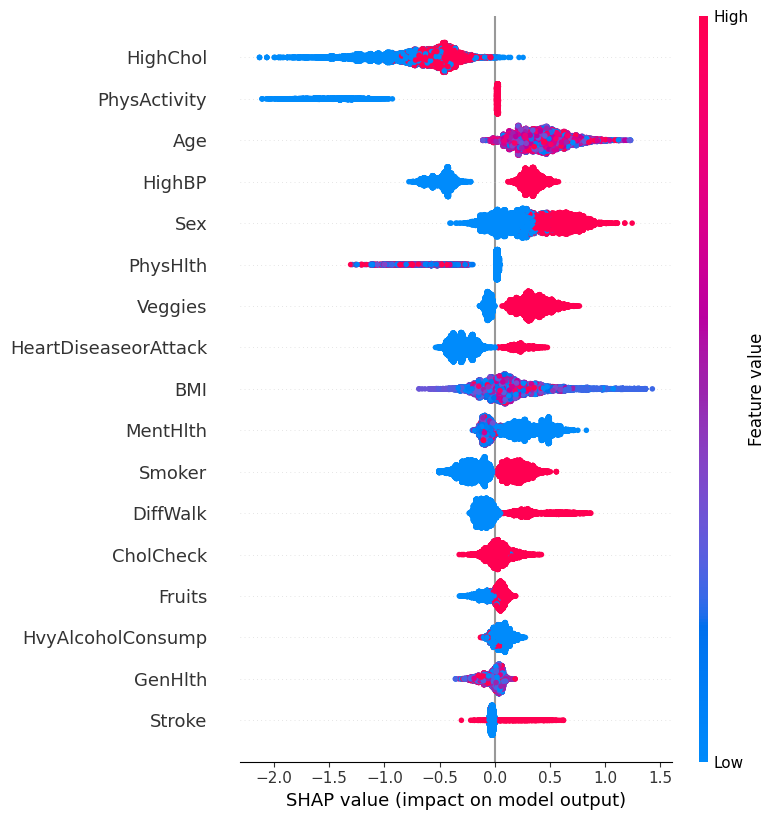

In [ ]:
# Inserte código para generar gráficos de aporte global aquí
shap.summary_plot(shap_values, X_test)

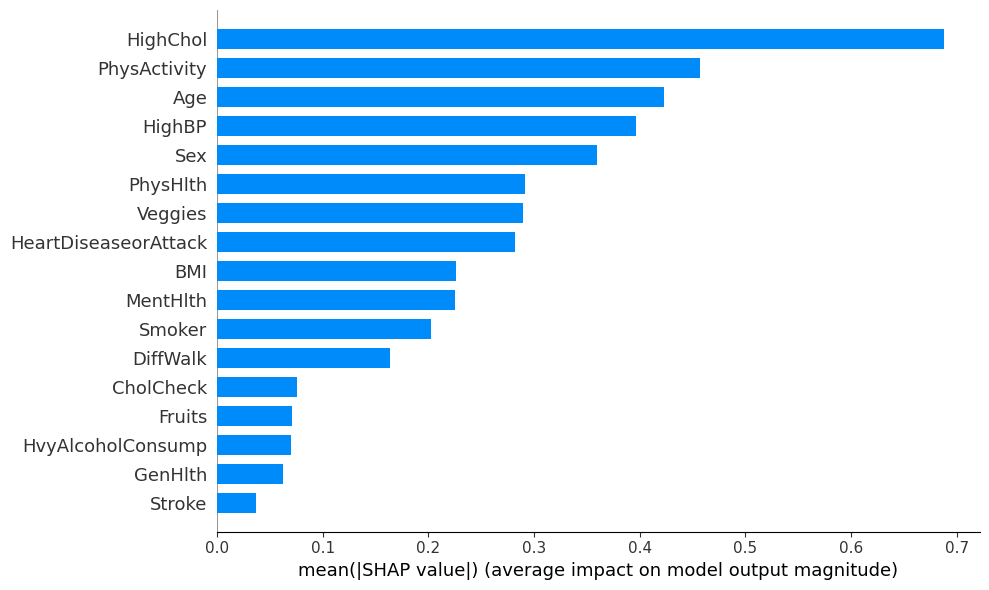

In [ ]:
shap.summary_plot(shap_values, X_test, plot_type='bar', plot_size=(10, 6))
plt.show()

Los shap values reflejan la importancia promedio de cada variable a lo largo de todas las predicciones del modelo. A diferencia del análisis a nivel de instancia que puede resaltar cómo cada variable impacta predicciones específicas, mostrando variaciones entre casos individuales.

La diferencia entre una interpretación general y un enfoque específico radica en que el gráfico shap resalta la importancia general de las variables para el modelo en su conjunto. Por otro lado, el análisis a nivel de instancia ofrece conclusiones detalladas sobre cómo una variable específica afecta una predicción concreta para un individuo en particular.

### 5.4 Scatter plot (0.4 puntos)

Grafique ahora un *scatterplot* entre los *shap values* y las primeras 5 features con mayor impacto global (un gráfico por cada feature), coloreando cada punto por la probabilidad de tener diabetes. ¿Qué puede concluir de sus resultados?

[21:04:27] WARNING: /workspace/src/c_api/c_api.cc:1240: Saving into deprecated binary model format, please consider using `json` or `ubj`. Model format will default to JSON in XGBoost 2.2 if not specified.


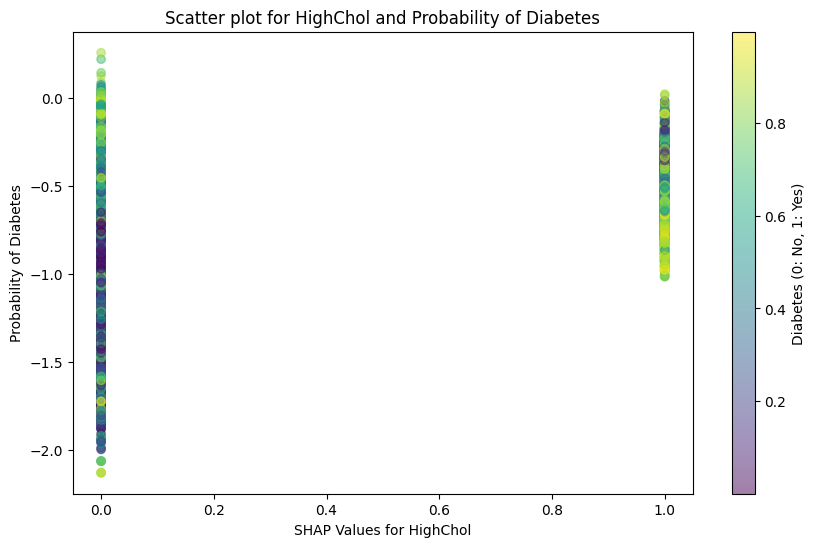

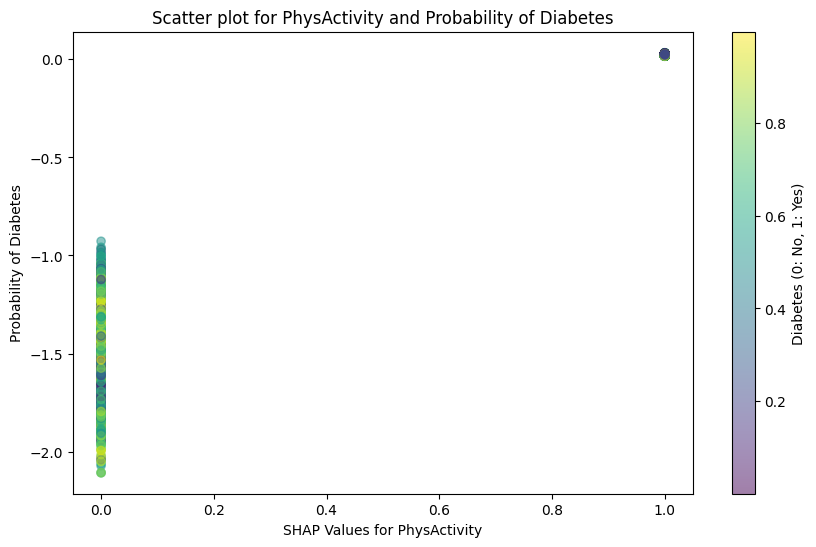

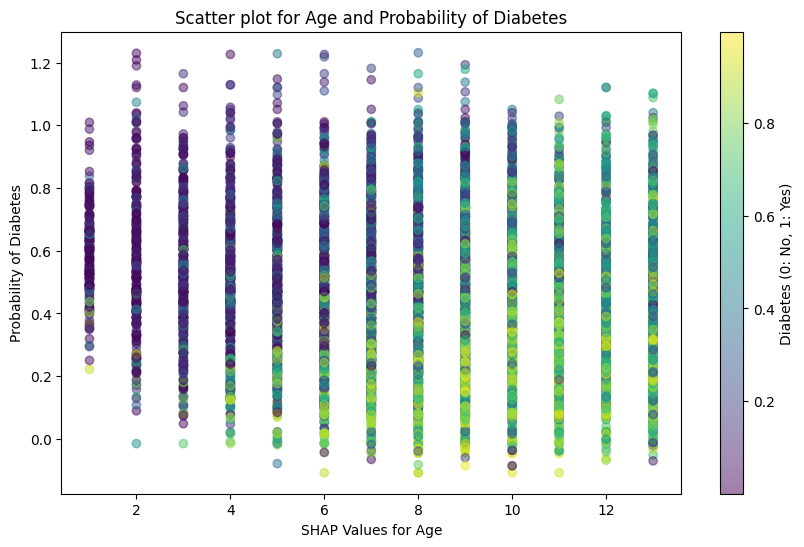

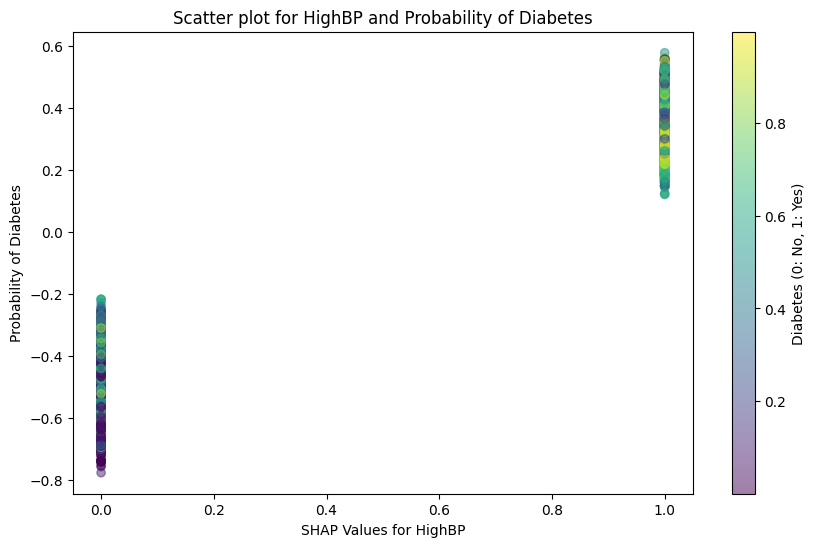

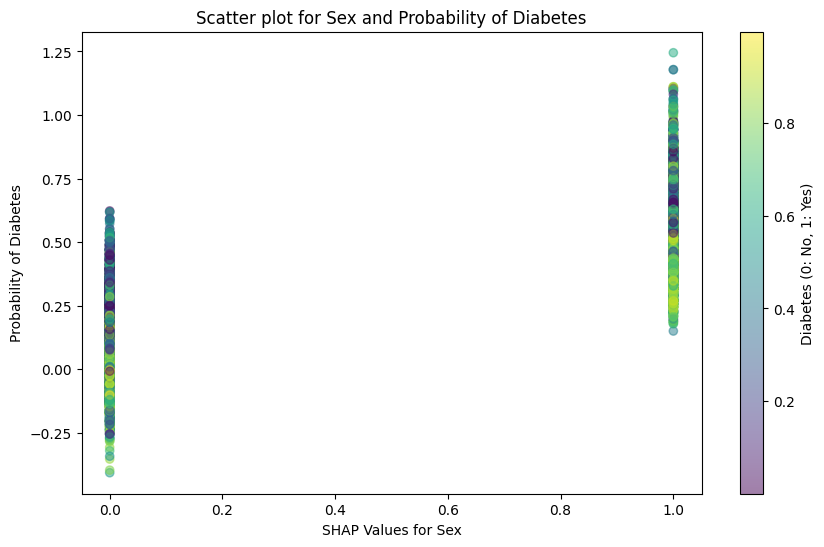

In [ ]:
# Inserte código para generar gráficos de val vs shap value aquí
# creamos el explainer
explainer = shap.TreeExplainer(pipeline.named_steps['classifier'])

# calculamos los shapley values
shap_values = explainer.shap_values(X_test)

# calculamos el promedio absoluto de cada característica
summary_vals = np.abs(shap_values).mean(axis=0)

# tomamos el top 5 categorias
top = summary_vals.argsort()[::-1][:5]
proba = pipeline.predict_proba(X_test)[:, 1]

# creamos los graficos para cada características
for val in top:
    plt.figure(figsize=(10, 6))

    # Scatter plot entre los valores SHAP y la probabilidad de tener diabetes, con puntos de tamaño proporcional al valor SHAP
    plt.scatter(X_test.iloc[:, val], shap_values[:, val], c=proba, cmap=None, alpha=0.5)

    # Configuración del gráfico
    plt.xlabel(f'SHAP Values for {X_test.columns[val]}')
    plt.ylabel('Probability of Diabetes')
    plt.title(f'Scatter plot for {X_test.columns[val]} and Probability of Diabetes')
    plt.colorbar(label='Diabetes (0: No, 1: Yes)')
    plt.show()


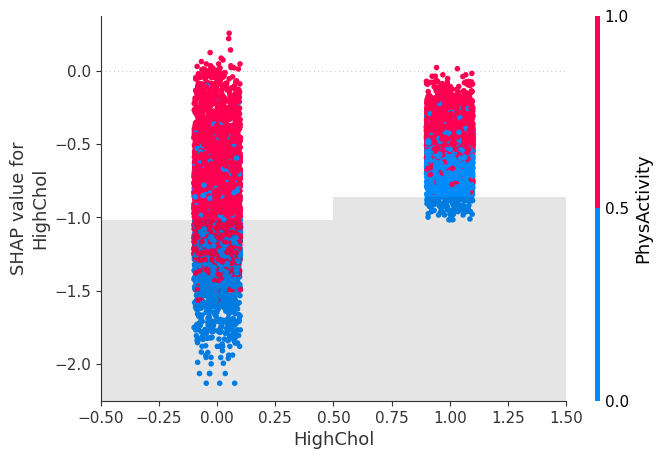

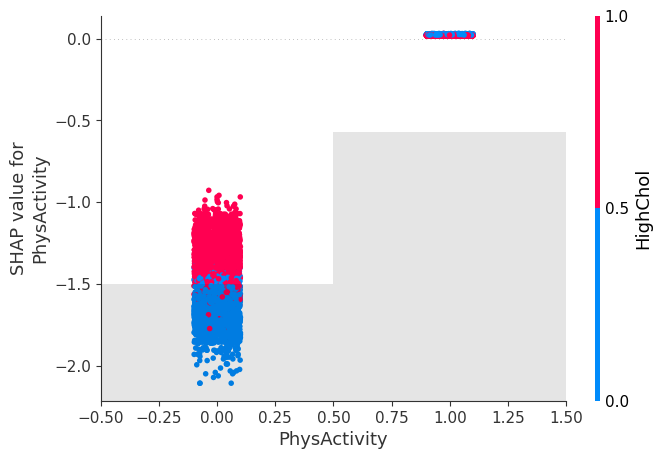

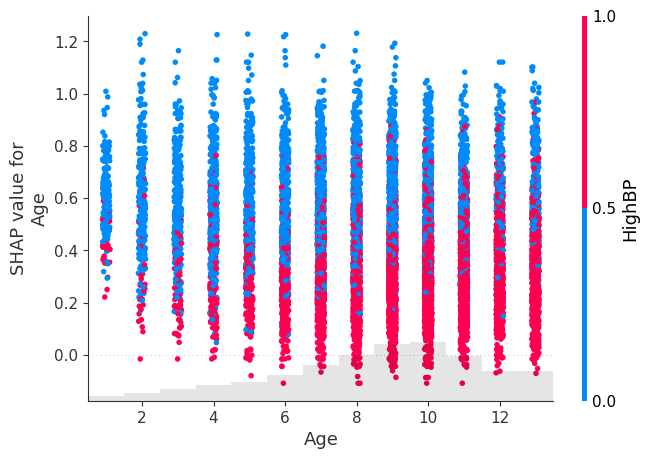

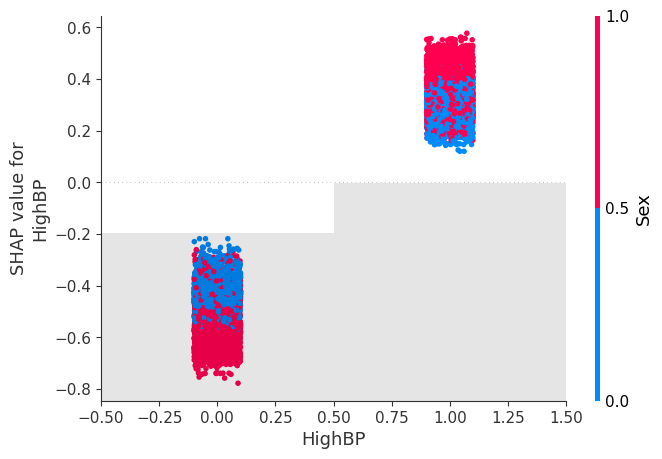

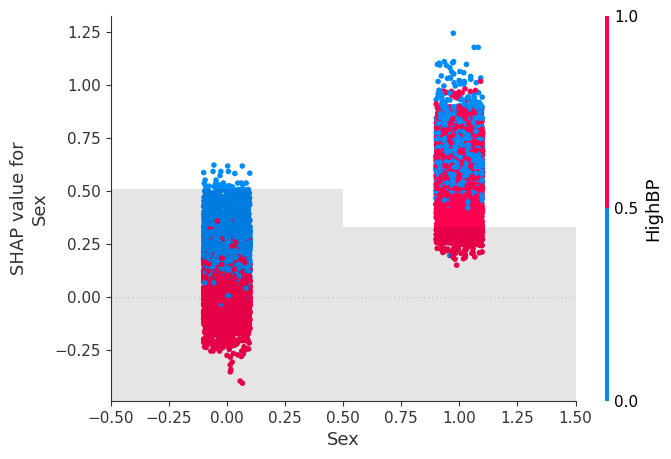

In [ ]:
# Mismo resultado pero con Shap
# obtenemos los shap values
shap_values_abs = np.mean(np.abs(shap_values.values), axis=0)

# Obtenemos los nombres ordenados de mayor a menor
feature_importance_names = X_train.columns[shap_values_abs.argsort()[::-1]]


for name in feature_importance_names[:5]:
    #shap.dependence_plot(name, shap_values.values, X)
    shap.plots.scatter(shap_values[:,name],
                       color=shap_values, xmin=0)

¿Qué puede concluir de sus resultados?

Lo que se puede concluir de los graficos es que para las distintas variables la distribucion de pacientes con diabetes y sin diabetes, es proporcionalmente la misma. Esto se identifica por que aproximadamente para todas las variables existe la mitad de los datos rojos y la otra mitad azules, manteniendose para cada categoria de la variables habiendo unas pequeñas excpeciones como por ejemplo para age, en donde edades entre 0 y 4 poseen relativamente menos pacientes con diabetes. Cabe destacar que para HighCol = 0 parecieran existir una leve cantidad mayor de pacientes con diabetes, aun asi el colereo de la data apunta la existencia de proporciones similares entre ambas clases para todas las variables y categorias.

### 5.5 Partial Dependence Plot (0.4 puntos)

Finalmente, se le pide generar un gráfico del tipo **Partial Dependence Plot** para las mismas 5 variables con mayor impacto global usando una submuestra de **1000 observaciones**. ¿Qué relación existe entre la salida promedio del modelo y cada feature analizada? ¿Son estas conclusiones generalizables para todo el conjunto de datos?

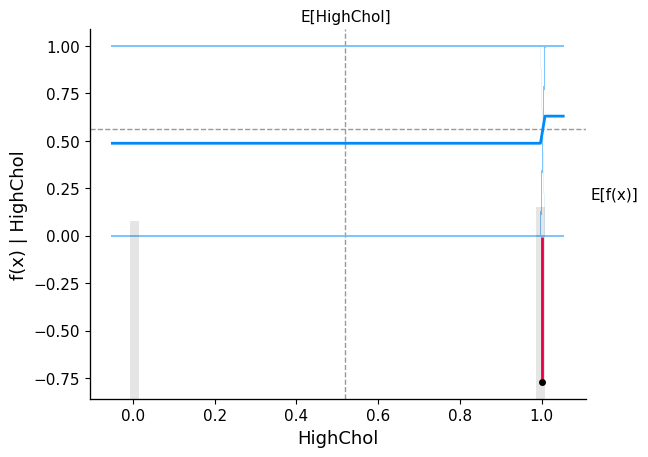

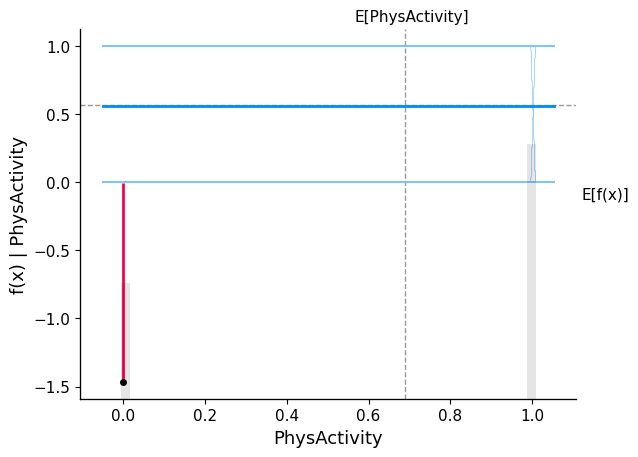

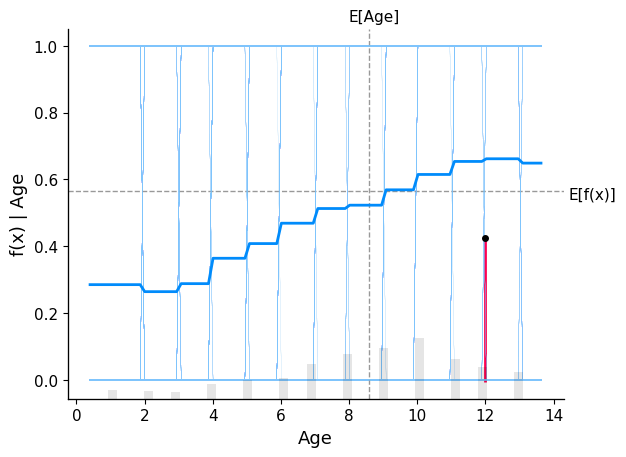

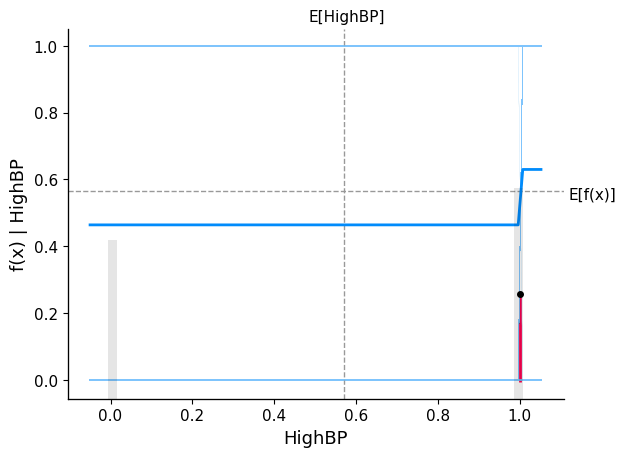

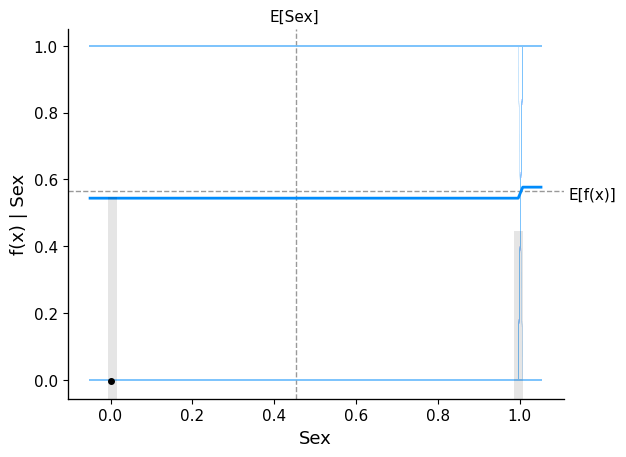

In [ ]:
for name in feature_importance_names[:5]:
  X1000 = shap.utils.sample(X_test, 1000)

  sample_ind = 20
  shap.partial_dependence_plot(
      name, pipeline.predict, X1000, model_expected_value=True,
      feature_expected_value=True, ice=True,
      shap_values=shap_values[sample_ind:sample_ind+1,:]
  )

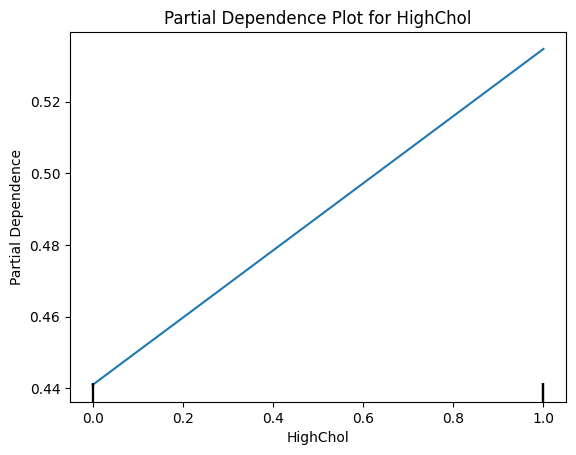

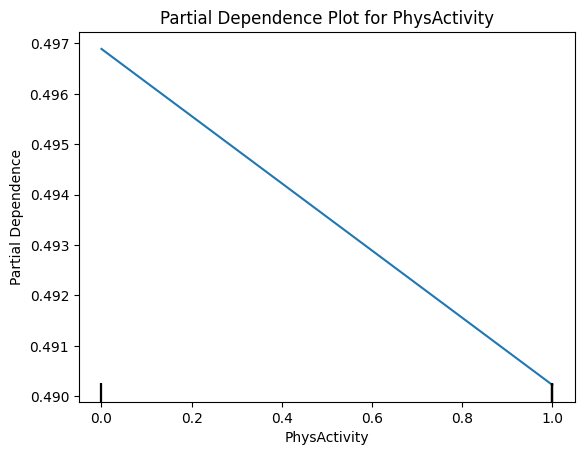

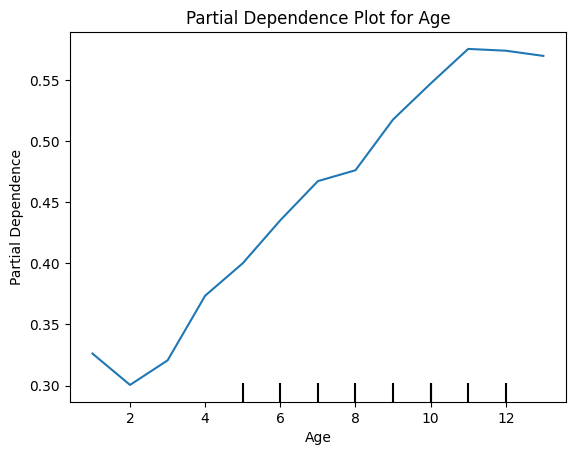

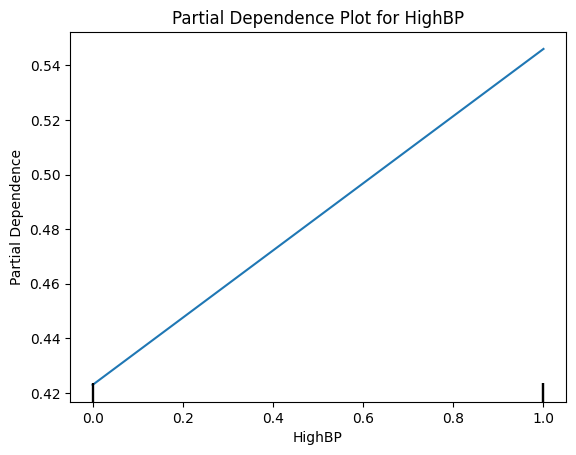

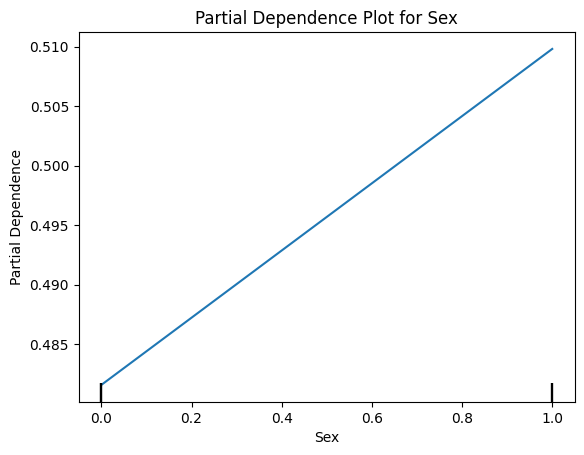

In [ ]:
# Inserte código para generar gráficos PDP aquí
from sklearn.inspection import PartialDependenceDisplay

#  top 5 características
top = summary_vals.argsort()[::-1][:5]

# creamos una muestra de 1000 observaciones
X_subsample = X_test.sample(n=1000, random_state=42)

# Graficamos PDP para las 5 variables
for feature in top:
    pd_plot = PartialDependenceDisplay.from_estimator(pipeline, X_subsample, [feature])
    pd_plot.plot(ax=plt.gca())
    plt.xlabel(X_test.columns[feature])
    plt.ylabel('Partial Dependence')
    plt.title(f'Partial Dependence Plot for {X_test.columns[feature]}')
    plt.show()


¿Qué relación existe entre la salida promedio del modelo y cada feature analizada? ¿Son estas conclusiones generalizables para todo el conjunto de datos?

La salida del promedio del modelo varia respecto a los valores de las variables, en donde varia en mas proporcion en algunas que en otras. Por ejemplo, para PhysActivity el valor se mantiene constante pero para Age varia drasticamente dependiendo del valor de dicha variable, en donde la respuesta del modelo aumenta su promedio para edades mayores a 4. En este caso, si el promedio de la salida aumenta sobre 0.5 es mas probable que el clasificador de como resultado la clase 1, sienda esta diabetes, por ello se puede deducir que las variables que aumentan las salida promedio son indicadores de diabetes. En general las variables que mas generan cambios, son Age , HighBP y HighCol.

¿Son estas conclusiones generalizables para todo el conjunto de datos?

Deberian serlo, esto se debe a que las proporciones se mantienen constantes con train_split(), por ello el resultado deberia ser el mismo para el resto de los conjuntos. Ahora, si es que las proporciones fueran distintas es posible que hayan variables mas relevantes que otras, obteniendo resultados distintos.

## 6. Sistema de Reglas! (1.0 puntos)

<p align="center">
  <img src="https://media.baamboozle.com/uploads/images/125978/1638281150_1380186_gif-url.gif" width="400">
</p>

Después de todo el trabajo hecho, Dr. Simi le pide simplificar el funcionamiento de su modelo en un sistema de reglas que le permita explicar a sus clientes las predicciones que genera su modelo. En particular, Dr. Simi le pide explicar la decisión tomada para las observaciones **1000**, **3001** y **5751**. Con las reglas propuestas señale a **cuánta población** es posible explicar con estas reglas e indique la **precisión** que poseen las reglas en la totalidad de los datos. ¿Tienen sentido sus reglas propuestas para las observaciones?. Fundamente sus respuesta señalando el impacto que tienen sus reglas sobre todo el conjunto de datos.

In [ ]:
!pip install alibi

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 524.2/524.2 kB 8.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 16.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.5/98.5 MB 2.0 MB/s eta 0:00:00


In [ ]:
from alibi.explainers import AnchorTabular

In [ ]:
# (predictor, feature_names, categorical_names=None, dtype=<class 'numpy.float32'>, ohe=False, seed=None)
# Inserte su código para generar sistema de reglas aquí

explainer = AnchorTabular(predictor=pipeline.named_steps['classifier'].predict, feature_names=X_test.columns.to_list(), seed=42)
class_names = ["no diabetes", "diabetes"]
explainer.fit(X_train.to_numpy())

AnchorTabular(meta={
  'name': 'AnchorTabular',
  'type': ['blackbox'],
  'explanations': ['local'],
  'params': {'seed': 42, 'disc_perc': (25, 50, 75)},
  'version': '0.9.4'}
)

In [ ]:
# Explicar predicción idx 1000
idx = 1000

explanation = explainer.explain(X_test.iloc[[idx]].to_numpy(), threshold=0.95)
print('Prediction: ', class_names[explainer.predictor(X_test.iloc[[idx]].to_numpy().reshape(1, -1))[0]])
print('Anchor: %s' % (' AND '.join(explanation.anchor)))
print('Precision: %.2f' % explanation.precision)
print('Coverage: %.2f' % explanation.coverage)
print(explainer.predictor(X_test.to_numpy()[idx].reshape(1, -1))[0])

Prediction:  diabetes
Anchor: PhysActivity > 0.00 AND HeartDiseaseorAttack > 0.00 AND PhysHlth <= 0.00
Precision: 0.99
Coverage: 0.04
1


In [ ]:
# Explicar predicción idx 3001
idx = 3001

explanation = explainer.explain(X_test.iloc[[idx]].to_numpy(), threshold=0.95)
print('Prediction: ', class_names[explainer.predictor(X_test.iloc[[idx]].to_numpy().reshape(1, -1))[0]])
print('Anchor: %s' % (' AND '.join(explanation.anchor)))
print('Precision: %.2f' % explanation.precision)
print('Coverage: %.2f' % explanation.coverage)

Prediction:  diabetes
Anchor: PhysActivity > 0.00 AND Smoker > 0.00 AND BMI > 33.00 AND PhysHlth <= 0.00
Precision: 0.98
Coverage: 0.03


In [ ]:
# Explicar predicción idx 5751
idx = 5751

explanation = explainer.explain(X_test.iloc[[idx]].to_numpy(), threshold=0.95)
print('Prediction: ', class_names[explainer.predictor(X_test.iloc[[idx]].to_numpy().reshape(1, -1))[0]])
print('Anchor: %s' % (' AND '.join(explanation.anchor)))
print('Precision: %.2f' % explanation.precision)
print('Coverage: %.2f' % explanation.coverage)

Prediction:  diabetes
Anchor: PhysActivity > 0.00 AND Smoker > 0.00 AND PhysHlth <= 0.00 AND HighChol > 0.00
Precision: 0.97
Coverage: 0.09


In [ ]:
# Explicar predicción idx 20
idx = 20

explanation = explainer.explain(X_test.iloc[[idx]].to_numpy(), threshold=0.95)
print('Prediction: ', class_names[explainer.predictor(X_test.iloc[[idx]].to_numpy().reshape(1, -1))[0]])
print('Anchor: %s' % (' AND '.join(explanation.anchor)))
print('Precision: %.2f' % explanation.precision)
print('Coverage: %.2f' % explanation.coverage)
print(explainer.predictor(X_test.to_numpy()[idx].reshape(1, -1))[0])

Prediction:  no diabetes
Anchor: PhysActivity <= 0.00 AND BMI > 33.00
Precision: 0.99
Coverage: 0.10
0


Para la observación 1000, la regla seleccionada es la que combina actividad física alta, antecedentes de enfermedad cardíaca o ataque al corazón, y buena salud física, con una precisión del 99% y una cobertura del 4%.

En la observación 3001, la regla aplicada es la que combina actividad física alta, hábito de fumar, índice de masa corporal (BMI) alto y buena salud física, con una precisión del 98% y una cobertura del 3%.

La observación 5751 se rige por la regla que requiere actividad física alta, hábito de fumar, buena salud física y niveles altos de colesterol, con una precisión del 97% y una cobertura del 9%.

Sin embargo, para la observación 20, la regla es diferente: pide baja actividad física y un BMI alto, con una precisión del 99% y una cobertura del 10%, prediciendo "no diabetes".

Esto indica que estas reglas logran explicar de manera precisa las predicciones del modelo en la mayoría de las situaciones para las que fueron diseñadas,  por lo que tienen una cobertura limitada, es decir, aplican únicamente a un pequeño porcentaje del conjunto total de datos.

Aunque las reglas son efectivas para ciertas situaciones específicas, no representan adecuadamente la diversidad y complejidad del conjunto completo de datos. Por lo que si bien son útiles para explicar algunas predicciones, podrían no ser suficientes para ofrecer una comprensión completa del modelo en todas las circunstancias ya que no son representativas ni generalizables para todo el conjunto de datos.

# Retrospectiva... (1.0 puntos)

En base a los diferentes métodos que implementa y ha comentado en este laboratorio, comente qué métodos le permiten entregar mejores conclusiones para la tarea de clasificación de diabetes. Por otro lado, ¿qué métodos son más útiles para el problema del doctor Simi, métodos agnosticos locales o globales?

> Fundamente su Respuesta aquí

Al fusionar métodos que exploran aspectos específicos(métodos locales) con aquellos que ofrecen una perspectiva más amplia(métodos globales), se obtiene una comprensión más holística del funcionamiento de los modelos de clasificación de la diabetes. El análisis revela que herramientas como SHAP, centradas en detalles individuales, y las Reglas de Anclaje, combinadas con enfoques más generales como la Evaluación de la Importancia de las Características y los Gráficos de Dependencia Parcial, proporcionan una visión integral sobre cómo el modelo toma sus decisiones.

Para el caso del Dr. Simi, la utilidad de estas técnicas es diversa. Los métodos más detallados, como las Reglas de Anclaje, resultan útiles para explicar decisiones puntuales, identificando patrones específicos que conducen a una predicción. En contraste, las técnicas que evalúan la relevancia global de las características son beneficiosas para comprender cómo estas influencian las predicciones en un contexto más amplio. La combinación de ambos enfoques ofrece una explicación más completa del modelo, adaptándose así a las distintas necesidades dentro del campo médico.

En medicina, tambíen es importante la interpretación humana. A pesar de la automatización, es importante entender y comunicar con claridad los resultados a pacientes y profesionales de la salud. Los resultados muestran la importancia de explicar de manera comprensible cómo se llega a las predicciones, especialmente en medicina donde la confianza en el diagnóstico puede influir en el tratamiento del paciente.

La transparencia y la ética también son aspectos esenciales en la aplicación de estas técnicas. Los resultados resaltan la necesidad de que los pacientes comprendan cómo se usan sus datos y cómo se generan las conclusiones.

Además, se ve la evolución constante de estas técnicas y la importancia de investigaciones continuas en su interpretación y explicación en el aprendizaje automático. Esto es importante para aumentar la confianza en modelos utilizados en medicina, donde la precisión y comprensión de las predicciones son fundamentales.

# Conclusión
Eso ha sido todo para el lab de hoy, recuerden que el laboratorio tiene un plazo de entrega de una semana. Cualquier duda del laboratorio, no duden en contactarnos por mail o U-cursos.

![Gracias Totales!](https://media.tenor.com/ctnq4bhZE3gAAAAC/drsimi-simi.gif)

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=87110296-876e-426f-b91d-aaf681223468' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>